# Project on "Analysis of Natural Disaster"

***Importing the necessary libraries for our project***

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Loading the natural disaster dataframe from our directory***

In [84]:
df = pd.read_excel(r"F:\2nd Trimister\PFM\Project Dataset\GROUP_ET_PFM_2.xlsx")
pd.set_option("display.max_columns", None)
df.head()

,Disaster Category,Disaster Type,Disaster Subtype,Event Name,Country,Subregion,Region,Location,Origin,Associated Types,AID Contribution,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs,Insured Damage,Total Damage,CPI,Entry Date,Last Update
0,Meteorological,Storm,Tropical cyclone,NaN,United States of America,Northern America,Americas,Galveston (Texas),NaN,"Avalanche (Snow, Debris)",NaN,220.0,Kph,1900,9.0,8.0,1900,9.0,8.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,2.842847,2004-10-18,2023-10-17
1,Hydrological,Flood,Flood (General),NaN,Jamaica,Latin America and the Caribbean,Americas,Saint James,NaN,NaN,NaN,NaN,Km2,1900,1.0,6.0,1900,1.0,6.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,2003-07-01,2023-09-25
2,Biological,Epidemic,Viral disease,Gastroenteritis,Jamaica,Latin America and the Caribbean,Americas,Porus,NaN,NaN,NaN,NaN,Vaccinated,1900,1.0,13.0,1900,1.0,13.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,2003-07-01,2023-09-25
3,Geophysical,Volcanic activity,Ash fall,NaN,Japan,Eastern Asia,Asia,NaN,NaN,NaN,NaN,NaN,NaN,1900,7.0,7.0,1900,7.0,7.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,2003-07-01,2023-09-25
4,Geophysical,Earthquake,Ground movement,NaN,Türkiye,Western Asia,Asia,"KARS,KARAKURT,KAGIZMAN,DIGOR",NaN,NaN,NaN,5.9,Richter,1900,7.0,12.0,1900,7.0,12.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,2019-08-05,2023-09-25


In [293]:
df.shape

(16867, 30)

***Here, I have been trying to replace the space between two words with underscore***

In [85]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

***If we want to know the datatype of each and every column from our dataframe, we can do that by just using the info method on the dataframe***

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16867 entries, 0 to 16866
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Disaster_Category     16867 non-null  object 
 1   Disaster_Type         16867 non-null  object 
 2   Disaster_Subtype      16867 non-null  object 
 3   Event_Name            4018 non-null   object 
 4   Country               16867 non-null  object 
 5   Subregion             16867 non-null  object 
 6   Region                16867 non-null  object 
 7   Location              15009 non-null  object 
 8   Origin                4170 non-null   object 
 9   Associated_Types      3696 non-null   object 
 10  AID_Contribution      776 non-null    float64
 11  Magnitude             5139 non-null   float64
 12  Magnitude_Scale       14848 non-null  object 
 13  Start_Year            16867 non-null  int64  
 14  Start_Month           16471 non-null  float64
 15  Start_Day          

***Here we are going to change the data type of the "Entry_date" and "Last_update" to date and time***

In [104]:
df[["Entry_Date", "Last_Update"]] = df[["Entry_Date", "Last_Update"]].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d'))

In [288]:
df.info()
#We can see that the data types has been converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16867 entries, 0 to 16866
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Disaster_Category     16867 non-null  object        
 1   Disaster_Type         16867 non-null  object        
 2   Disaster_Subtype      16867 non-null  object        
 3   Event_Name            4018 non-null   object        
 4   Country               16867 non-null  object        
 5   Subregion             16867 non-null  object        
 6   Region                16867 non-null  object        
 7   Location              15009 non-null  object        
 8   Origin                4170 non-null   object        
 9   Associated_Types      3696 non-null   object        
 10  AID_Contribution      776 non-null    float64       
 11  Magnitude             5139 non-null   float64       
 12  Magnitude_Scale       14848 non-null  object        
 13  Start_Year      

***Now,I want to know that how many values are null values***

In [87]:
df.isna().sum()

Disaster_Category           0
Disaster_Type               0
Disaster_Subtype            0
Event_Name              12849
Country                     0
Subregion                   0
Region                      0
Location                 1858
Origin                  12697
Associated_Types        13171
AID_Contribution        16091
Magnitude               11728
Magnitude_Scale          2019
Start_Year                  0
Start_Month               396
Start_Day                3625
End_Year                    0
End_Month                 700
End_Day                  3538
Total_Deaths             4858
No._Injured             12650
No._Affected             7053
No._Homeless            14387
Total_Affected           4558
Reconstruction_Costs    16828
Insured_Damage          15751
Total_Damage            11453
CPI                       309
Entry_Date                  0
Last_Update                 0
dtype: int64

### <font color="yellow">1. </font><font color='yellow'>Here, I want to know the total number of deaths caused by different types of disasters in all the years</font>

<Axes: title={'center': 'Deaths by Disaster Types'}, xlabel='Disaster_Type', ylabel='Number of deaths'>

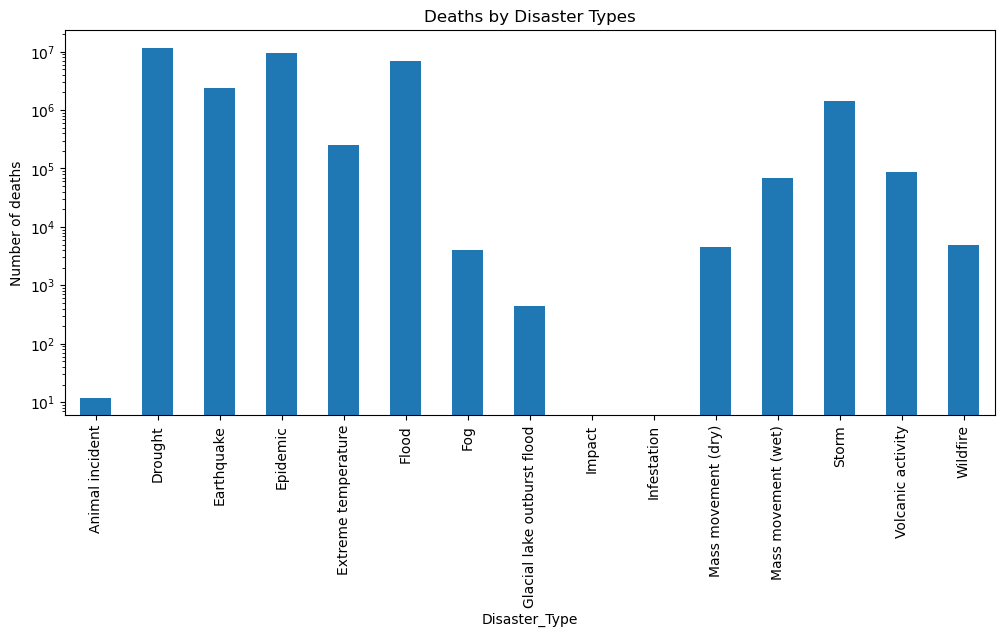

In [72]:
df.groupby("Disaster_Type")["Total_Deaths"].sum().plot(figsize=(12,5), kind="bar", xlabel="Disaster_Type", ylabel="Number of deaths", title="Deaths by Disaster Types", logy=True)

### <font color="yellow">2. </font><font color='yellow'>Here, I want to know the total number of deaths caused by different sub-types of disasters in all the years for "Asia" only</font>

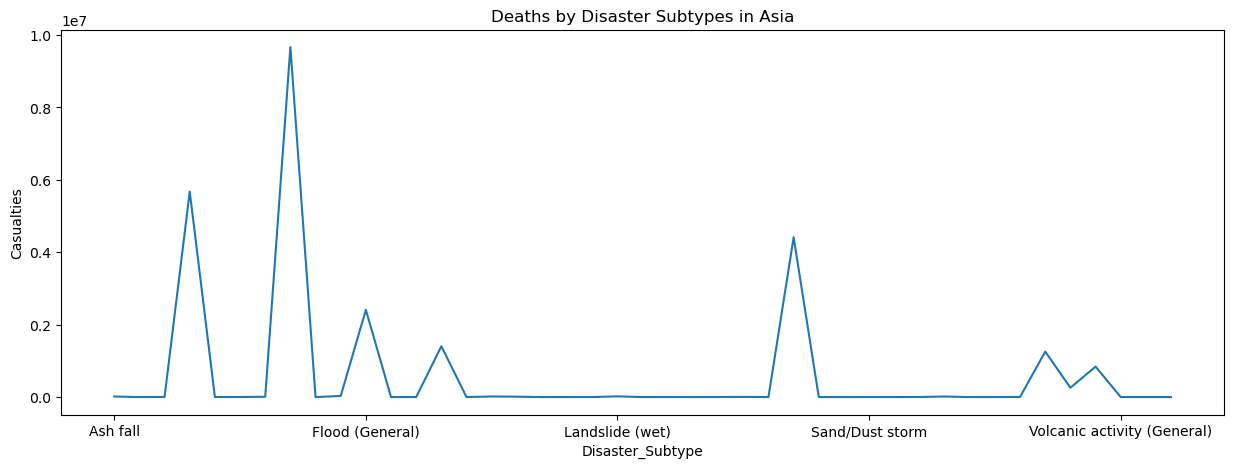

In [83]:
df[df["Region"]=="Asia"].groupby(["Disaster_Subtype"])["Total_Deaths"].sum().plot(figsize=(15,5), ylabel="Casualties", logy=False, title="Deaths by Disaster Subtypes in Asia")
plt.show()

### <font color="yellow">3. </font><font color='yellow'>If, I want to know the minimum and maximum number of casualties in the dataframe</font>

In [113]:
df[(df["Total_Deaths"]==df["Total_Deaths"].max()) | (df["Total_Deaths"]==df["Total_Deaths"].min())]

,Disaster_Category,Disaster_Type,Disaster_Subtype,Event_Name,Country,Subregion,Region,Location,Origin,Associated_Types,AID_Contribution,Magnitude,Magnitude_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,No._Injured,No._Affected,No._Homeless,Total_Affected,Reconstruction_Costs,Insured_Damage,Total_Damage,CPI,Entry_Date,Last_Update
289,Hydrological,Flood,Riverine flood,NaN,China,Eastern Asia,Asia,NaN,NaN,Famine,NaN,NaN,Km2,1931,7.0,NaN,1931,8.0,NaN,3700000.0,NaN,NaN,NaN,NaN,NaN,NaN,1400000.0,5.193030,2008-12-10,2023-09-25
6229,Geophysical,Earthquake,Tsunami,NaN,Vanuatu,Melanesia,Oceania,Santa Cruz Isl.(archip.),Earthquake,Tsunami/Tidal wave,NaN,7.7,Richter,1997,4.0,21.0,1997,4.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,2005-04-27,2023-09-25


### <font color="yellow">4. </font><font color='yellow'>We are now keen to know the number of deaths and injuries by disaster types for "China" </font>

In [116]:
df[df["Country"]=="China"].groupby("Disaster_Type")[["Total_Deaths", "No._Injured"]].sum()

,Total_Deaths,No._Injured
Disaster_Type,,
Drought,3503534.0,0.0
Earthquake,652549.0,672714.0
Epidemic,1561482.0,0.0
Extreme temperature,384.0,4822.0
Flood,6622535.0,827148.0
Infestation,0.0,0.0
Mass movement (dry),500.0,135.0
Mass movement (wet),5881.0,1744.0
Storm,175183.0,183166.0


[]

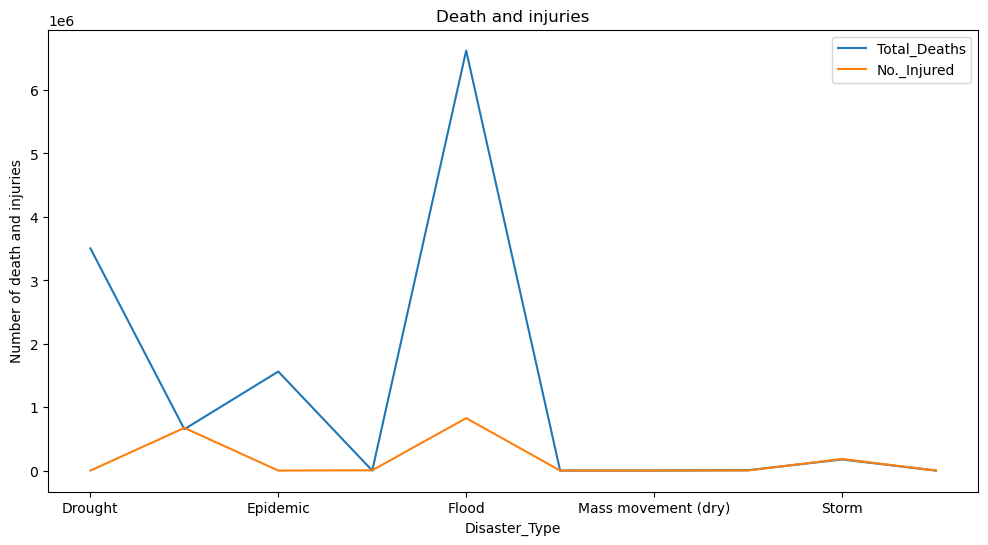

In [289]:
#Here we are just plotting the above outcome using inbuild plot method of pandas
df[df["Country"]=="China"].groupby("Disaster_Type")[["Total_Deaths", "No._Injured"]].sum().plot(figsize=(12, 6), ylabel="Number of death and injuries", title="Death and injuries")
plt.plot()

### <font color="yellow">5. </font><font color='yellow'>I keen to know the total number of deaths caused by different types of disasters in all the years for "India" only</font>

In [133]:
df[df["Country"]=="India"].groupby("Disaster_Type")["Total_Damage"].sum()

Disaster_Type
Drought                         6541122.0
Earthquake                      5341700.0
Epidemic                              0.0
Extreme temperature              544000.0
Flood                          92147168.0
Glacial lake outburst flood      210000.0
Infestation                           0.0
Mass movement (dry)                   0.0
Mass movement (wet)               54500.0
Storm                          44690996.0
Wildfire                           2000.0
Name: Total_Damage, dtype: float64

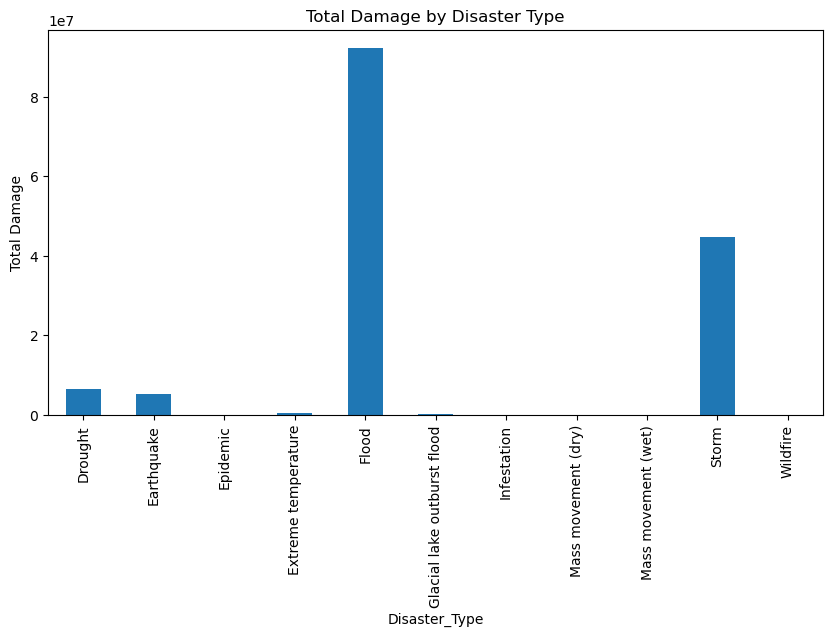

In [290]:
#I am just plotting the above outcome using pandas inbuild plot method.
df[df["Country"]=="India"].groupby("Disaster_Type")["Total_Damage"].sum().plot(figsize=(10,5), ylabel="Total Damage", title="Total Damage by Disaster Type", kind="bar")
plt.show()

### <font color="yellow">6. </font><font color='yellow'>Number of deaths and injuries caused by disaster category</font>

In [136]:
df.groupby("Disaster_Category")[["Total_Deaths", "No._Injured"]].sum()

,Total_Deaths,No._Injured
Disaster_Category,,
Biological,9622187.0,2816397.0
Climatological,11739377.0,16038.0
Extra-terrestrial,0.0,1491.0
Geophysical,2495724.0,2957820.0
Hydrological,7077351.0,1410274.0
Meteorological,1677995.0,3472350.0


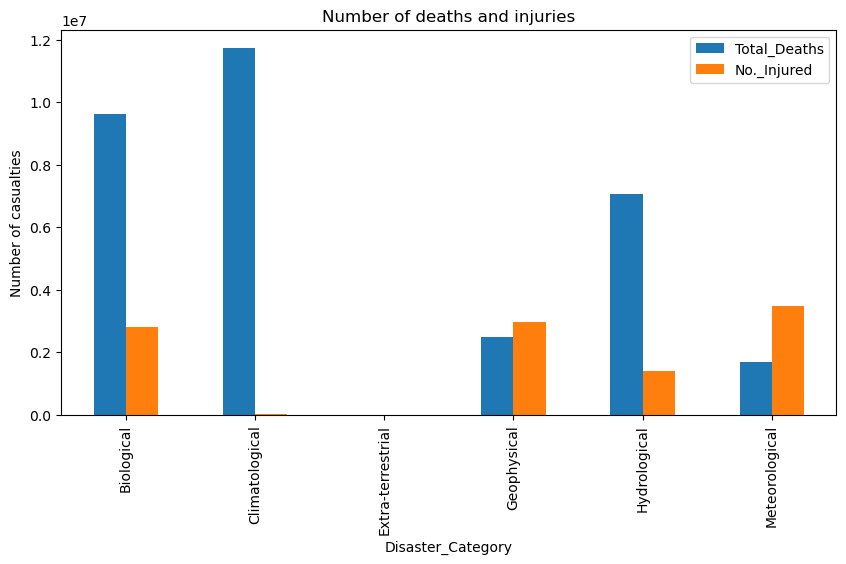

In [142]:
df.groupby("Disaster_Category")[["Total_Deaths", "No._Injured"]].sum().plot(figsize=(10, 5), kind="bar", ylabel="Number of casualties", title="Number of deaths and injuries")
plt.show()

### <font color="yellow">7. </font><font color='yellow'>Number of deaths and injuries by disaster category and disaster types</font>

In [137]:
df.groupby(["Disaster_Category", "Disaster_Type"])[["Total_Deaths", "No._Injured"]].sum()

Total_Deaths  No._Injured
Disaster_Category Disaster_Type                                         
Biological        Animal incident                      12.0          0.0
                  Epidemic                        9622175.0    2816397.0
                  Infestation                           0.0          0.0
Climatological    Drought                        11734025.0         32.0
                  Glacial lake outburst flood         439.0         24.0
                  Wildfire                           4913.0      15982.0
Extra-terrestrial Impact                                0.0       1491.0
Geophysical       Earthquake                      2404326.0    2930895.0
                  Mass movement (dry)                4486.0        373.0
                  Volcanic activity                 86912.0      26552.0
Hydrological      Flood                           7009119.0    1397761.0
                  Mass movement (wet)               68232.0      12513.0
Meteorological    Extreme temperature              256214.0    2066616.0
                  Fog                                4000.0          0.0
                  Storm                           1417781.0    1405734.0

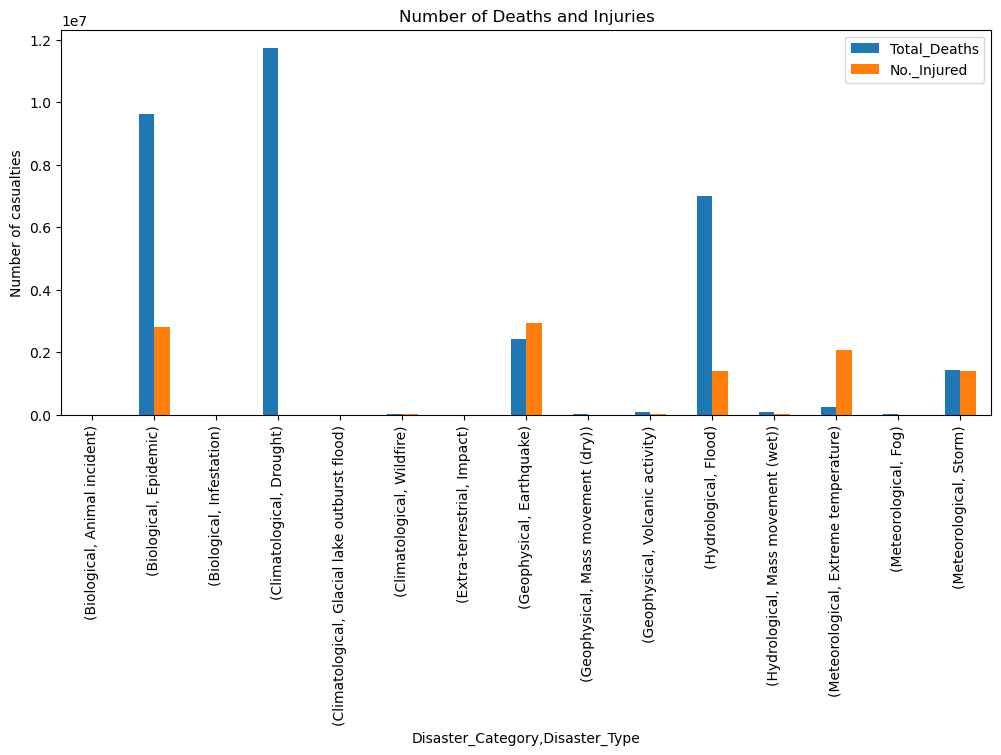

In [291]:
#Plotting the above outcomes
df.groupby(["Disaster_Category", "Disaster_Type"])[["Total_Deaths", "No._Injured"]].sum().plot(figsize=(12,5), kind="bar", ylabel="Number of casualties", title="Number of Deaths and Injuries")
plt.show()

### <font color="yellow">8. </font><font color='yellow'>Number of deaths by country whose CPI are greater than the mean of the whole</font>

In [168]:
df[df["CPI"] > df["CPI"].mean()].groupby("Country")["Total_Deaths"].sum().to_frame().sort_values(by="Total_Deaths", ascending=False).head(10)

,Total_Deaths
Country,
Haiti,240386.0
Indonesia,189149.0
Myanmar,139997.0
China,114774.0
India,88033.0
Pakistan,87589.0
Russian Federation,58278.0
Italy,39127.0
Sri Lanka,38021.0


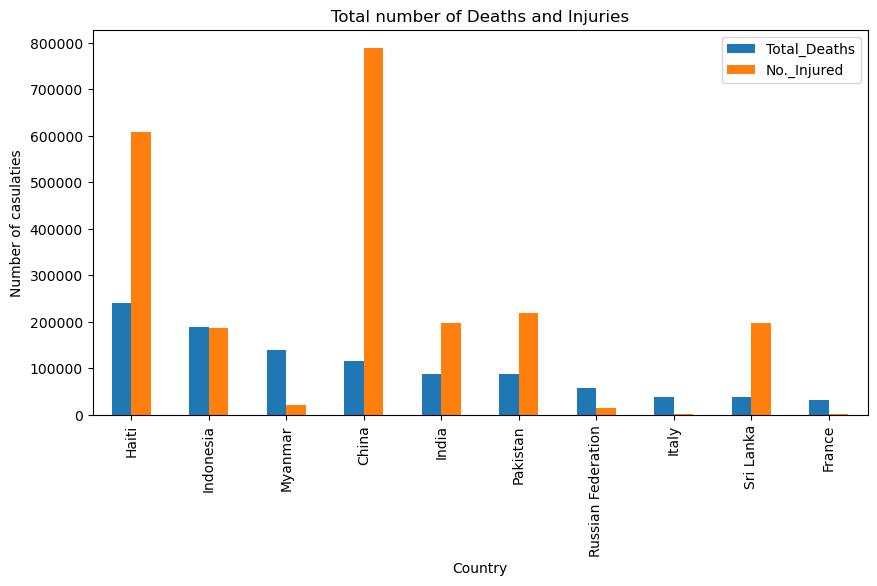

In [174]:
df[df["CPI"] > df["CPI"].mean()].groupby("Country")[["Total_Deaths", "No._Injured"]].sum().sort_values(by="Total_Deaths", ascending=False).head(10).plot(figsize=(10, 5), kind="bar", ylabel="Number of casulaties", title="Total number of Deaths and Injuries")
plt.show()

### <font color="yellow">9. </font><font color='yellow'>Number of deaths and injuries by disaster types for "India" in the year "2023".</font>

In [206]:
import datetime as dt
y = df[(df["Entry_Date"].dt.year == 2023) & (df["Country"]=="India")].groupby("Disaster_Type")[["Total_Deaths", "No._Injured"]].sum().sort_values(by="Total_Deaths", ascending=False)
y

,Total_Deaths,No._Injured
Disaster_Type,,
Flood,621.0,614.0
Glacial lake outburst flood,178.0,0.0
Extreme temperature,109.0,330.0
Mass movement (wet),64.0,2.0
Storm,59.0,53.0


In [208]:
y.reset_index(inplace=True)

Text(0.5, 1.0, 'Number of deaths in India in 2023 due to disasters')

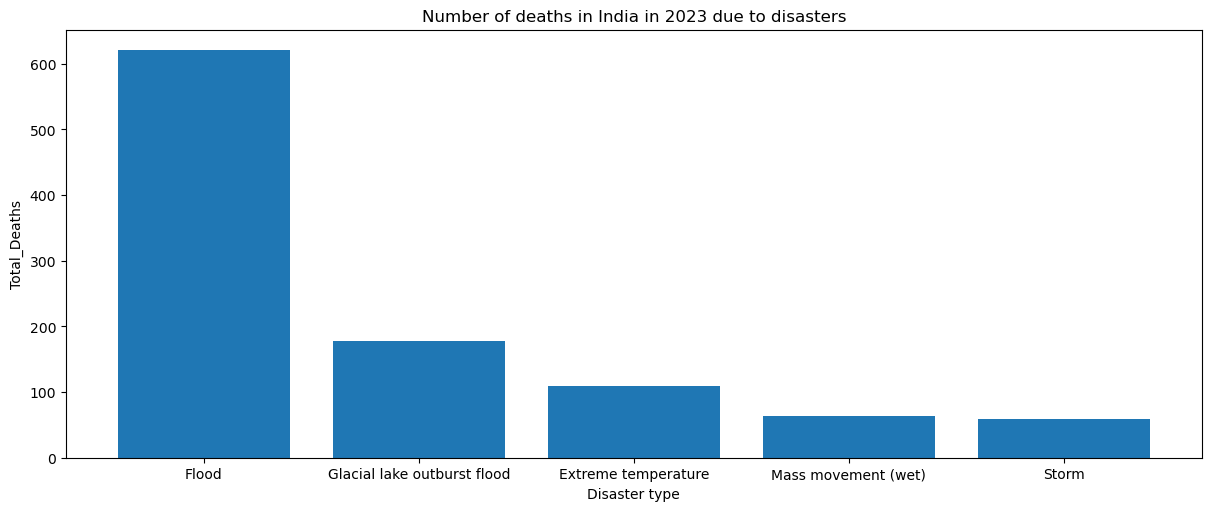

In [292]:
#Plotting the above outputs.
fig, ax = plt.subplots(figsize = (12,5), layout='constrained')
ax.bar(y["Disaster_Type"], y["Total_Deaths"])
ax.set_xlabel("Disaster type")
ax.set_ylabel("Total_Deaths")
ax.set_title("Number of deaths in India in 2023 due to disasters")

### <font color="yellow">10. Getting the days with maximum difference of entry date and last update.</font><font color='yellow'></font>

In [239]:
df[(df["Last_Update"].dt.day - df["Entry_Date"].dt.day)==(df["Last_Update"].dt.day - df["Entry_Date"].dt.day).max()]

,Disaster_Category,Disaster_Type,Disaster_Subtype,Event_Name,Country,Subregion,Region,Location,Origin,Associated_Types,AID_Contribution,Magnitude,Magnitude_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,No._Injured,No._Affected,No._Homeless,Total_Affected,Reconstruction_Costs,Insured_Damage,Total_Damage,CPI,Entry_Date,Last_Update
16286,Meteorological,Storm,Tropical cyclone,Tropical cyclone 'Agatha',Mexico,Latin America and the Caribbean,Americas,Coastal and Santiago Xanica (Sierra Sur Region...,NaN,"Flood|Slide (land, mud, snow, rock)",NaN,16.0,Kph,2022,5.0,30.0,2022,5.0,31.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,51000.0,100.0,2022-06-01,2023-09-26
16287,Geophysical,Earthquake,Ground movement,NaN,China,Eastern Asia,Asia,"Baoxing, Lushan counties (Sichuan province)",NaN,"Slide (land, mud, snow, rock)",NaN,5.8,Richter,2022,6.0,1.0,2022,6.0,1.0,4.0,41.0,13500.0,NaN,13541.0,NaN,NaN,42000.0,100.0,2022-06-01,2023-09-26


### <font color="yellow">11. Getting the days with minimum difference of entry date and last update.</font><font color='yellow'></font>

In [240]:
df[(df["Last_Update"].dt.day - df["Entry_Date"].dt.day)==(df["Last_Update"].dt.day - df["Entry_Date"].dt.day).min()]

,Disaster_Category,Disaster_Type,Disaster_Subtype,Event_Name,Country,Subregion,Region,Location,Origin,Associated_Types,AID_Contribution,Magnitude,Magnitude_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,No._Injured,No._Affected,No._Homeless,Total_Affected,Reconstruction_Costs,Insured_Damage,Total_Damage,CPI,Entry_Date,Last_Update
16863,Hydrological,Flood,Flood (General),NaN,Australia,Australia and New Zealand,Oceania,"New South Wales, Victoria, South Australia and...",Heavy rains,Lightening|Storm,NaN,NaN,Km2,2023,11.0,27.0,2023,11.0,30.0,NaN,NaN,390.0,NaN,390.0,NaN,NaN,NaN,NaN,2023-11-30,2023-12-01


### <font color="yellow">12. Getting the days which are greater than mean difference of entry date and last update and grouping the data by disaster type and finding the total deaths and injuries.</font><font color='yellow'></font>

In [274]:
#Number of deaths and injuries by disaster types with the difference of last update date and entry date
a = df[(df["Last_Update"].dt.day - df["Entry_Date"].dt.day)>(df["Last_Update"].dt.day - df["Entry_Date"].dt.day).mean()].groupby("Disaster_Type")[["Total_Deaths", "No._Injured"]].sum().sort_values(by="Total_Deaths", ascending=False).head(8)
a

,Total_Deaths,No._Injured
Disaster_Type,,
Epidemic,9512185.0,763813.0
Drought,4784585.0,32.0
Flood,4683506.0,762695.0
Storm,1241736.0,1137969.0
Earthquake,521011.0,790201.0
Mass movement (wet),52736.0,8646.0
Extreme temperature,50023.0,149761.0
Volcanic activity,21148.0,18084.0


In [275]:
a.reset_index(inplace=True)

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


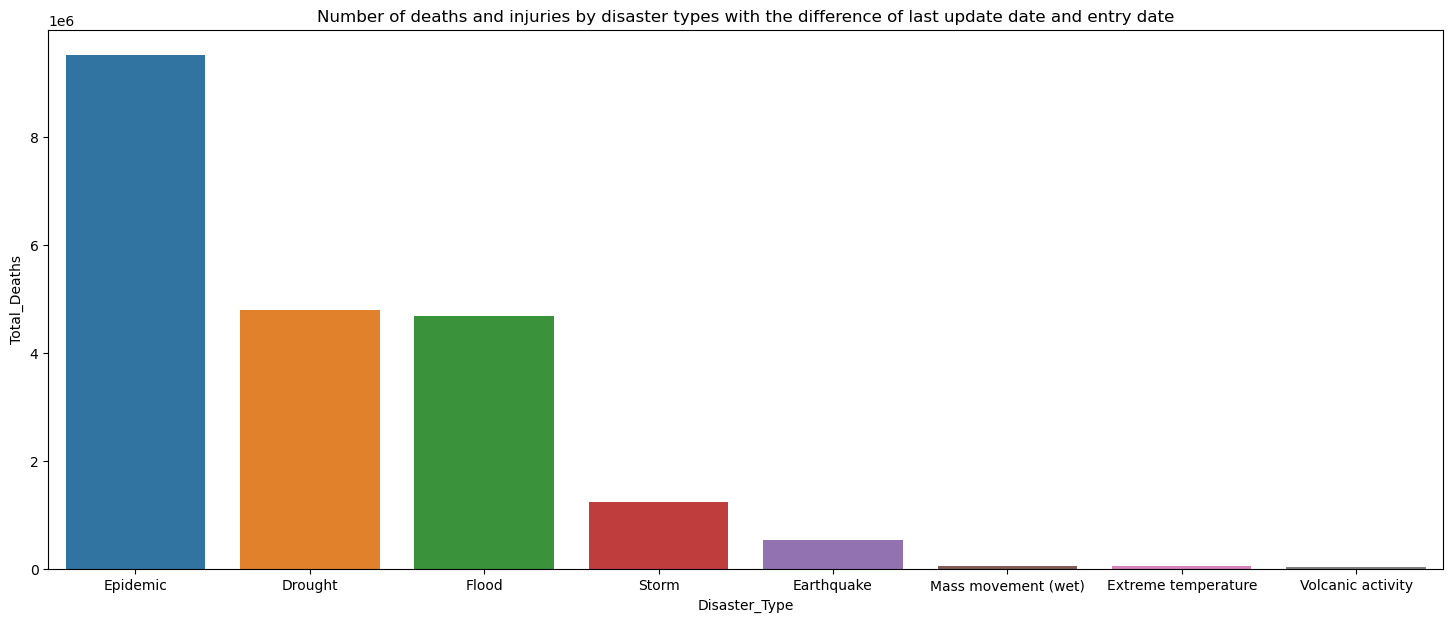

In [294]:
#Here we are plotting the outcomes of the above
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(a, x="Disaster_Type", y="Total_Deaths", errorbar=None)
plt.title("Number of deaths and injuries by disaster types with the difference of last update date and entry date")
plt.show()

### <font color="yellow">13. Getting the days which are lesser than mean difference of entry date and last update and grouping the data by disaster type and finding the total deaths and injuries.</font><font color='yellow'></font>

In [280]:
#Similarly number of deaths and injuries by disaster types wich has lesser difference of means from last update date and entry date
b= df[(df["Last_Update"].dt.day - df["Entry_Date"].dt.day)<(df["Last_Update"].dt.day - df["Entry_Date"].dt.day).mean()].groupby("Disaster_Type")[["Total_Deaths", "No._Injured"]].sum().sort_values(by="Total_Deaths", ascending=False).head(8)
b

,Total_Deaths,No._Injured
Disaster_Type,,
Drought,6949440.0,0.0
Flood,2325613.0,635066.0
Earthquake,1883315.0,2140694.0
Extreme temperature,206191.0,1916855.0
Storm,176045.0,267765.0
Epidemic,109990.0,2052584.0
Volcanic activity,65764.0,8468.0
Mass movement (wet),15496.0,3867.0


In [281]:
b.reset_index(inplace=True)

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Similarly number of deaths and injuries by disaster types wich has lesser difference of means from last update date and entry date')

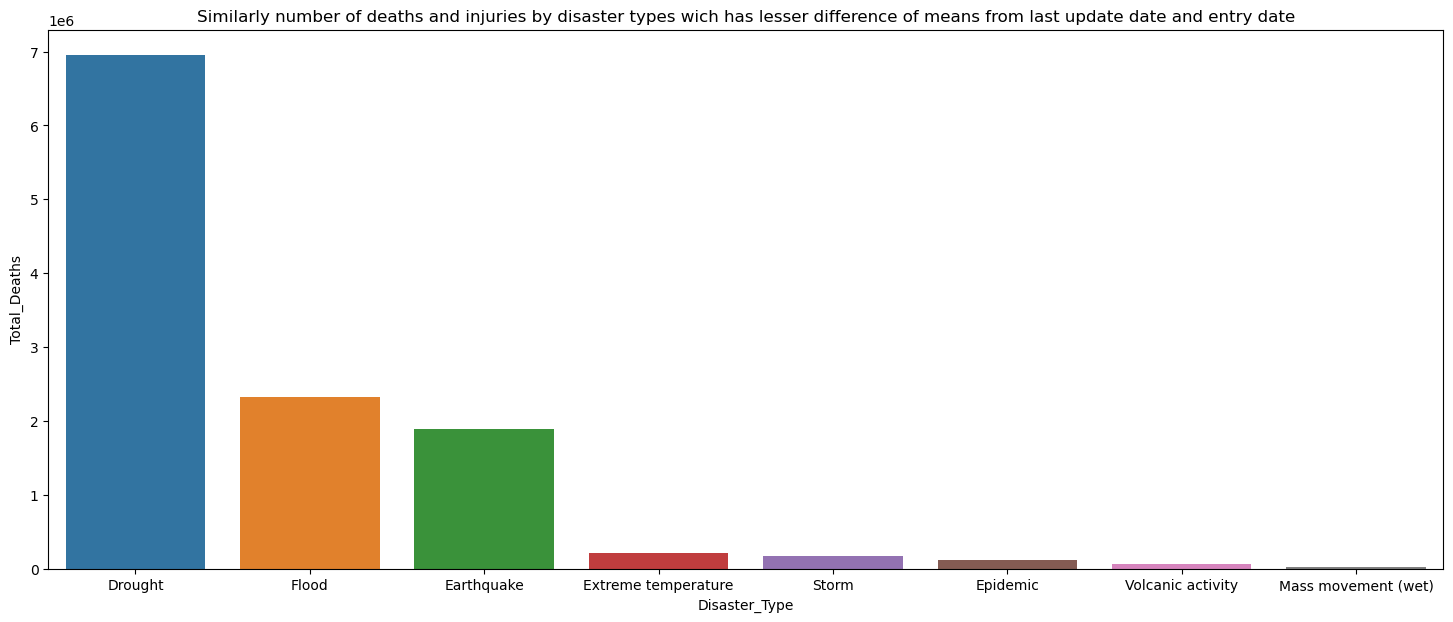

In [295]:
#Plotting the outcome of the above
fig, ax = plt.subplots(figsize = (18,7))
sns.barplot(b, x="Disaster_Type",y= "Total_Deaths", errorbar=None)
ax.set_title("Similarly number of deaths and injuries by disaster types wich has lesser difference of means from last update date and entry date")

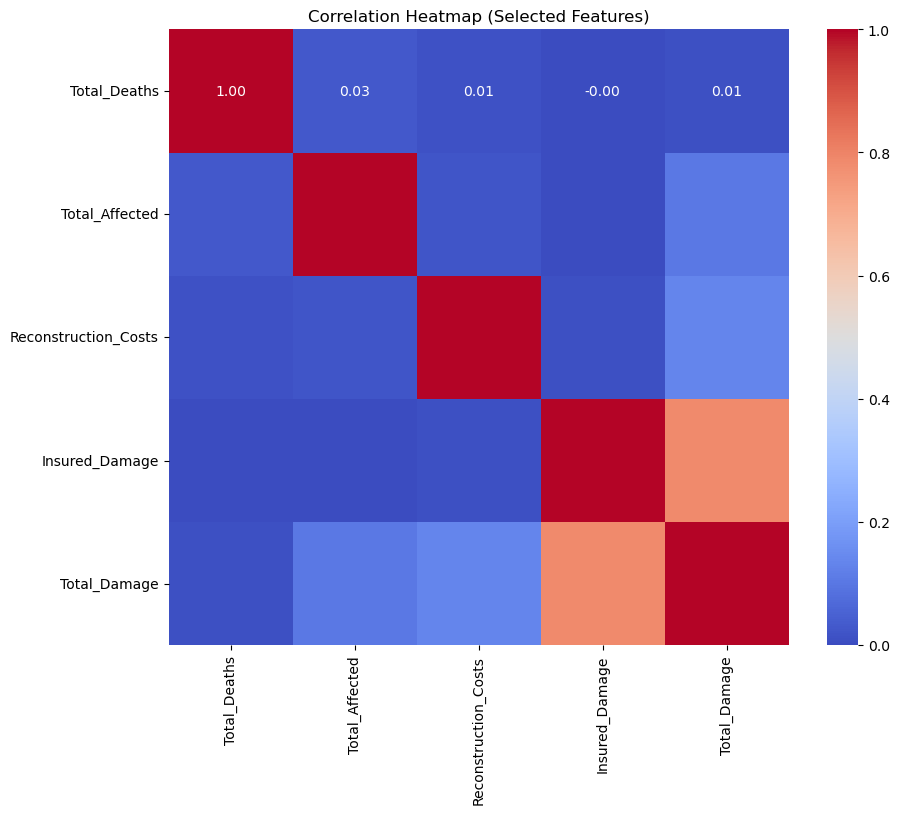

In [300]:
selected_features = ['Total_Deaths', 'Total_Affected', 'Reconstruction_Costs', 'Insured_Damage', 'Total_Damage']
correlation_matrix_selected = df[selected_features].corr()
 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

### <font color="yellow">14. Now we are going to replace thr null values with "0" and dropping some unrevelant columns.</font><font color='yellow'></font>

In [299]:
df.update(df[['Total_Deaths','No._Injured','No._Affected','No._Homeless','Total_Affected',

              'Reconstruction_Costs','Insured_Damage','Total_Damage','CPI']].fillna(0))

df.drop(columns=['Origin','Associated_Types','AID_Contribution','Magnitude'])

,Disaster_Category,Disaster_Type,Disaster_Subtype,Event_Name,Country,Subregion,Region,Location,Magnitude_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,No._Injured,No._Affected,No._Homeless,Total_Affected,Reconstruction_Costs,Insured_Damage,Total_Damage,CPI,Entry_Date,Last_Update
0,Meteorological,Storm,Tropical cyclone,NaN,United States of America,Northern America,Americas,Galveston (Texas),Kph,1900,9.0,8.0,1900,9.0,8.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,2.842847,2004-10-18,2023-10-17
1,Hydrological,Flood,Flood (General),NaN,Jamaica,Latin America and the Caribbean,Americas,Saint James,Km2,1900,1.0,6.0,1900,1.0,6.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.842847,2003-07-01,2023-09-25
2,Biological,Epidemic,Viral disease,Gastroenteritis,Jamaica,Latin America and the Caribbean,Americas,Porus,Vaccinated,1900,1.0,13.0,1900,1.0,13.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.842847,2003-07-01,2023-09-25
3,Geophysical,Volcanic activity,Ash fall,NaN,Japan,Eastern Asia,Asia,NaN,NaN,1900,7.0,7.0,1900,7.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.842847,2003-07-01,2023-09-25
4,Geophysical,Earthquake,Ground movement,NaN,Türkiye,Western Asia,Asia,"KARS,KARAKURT,KAGIZMAN,DIGOR",Richter,1900,7.0,12.0,1900,7.0,12.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.842847,2019-08-05,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,Meteorological,Storm,Severe weather,NaN,India,Southern Asia,Asia,Gujarat state,Kph,2023,11.0,26.0,2023,11.0,27.0,24.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.000000,2023-11-28,2023-12-01
16863,Hydrological,Flood,Flood (General),NaN,Australia,Australia and New Zealand,Oceania,"New South Wales, Victoria, South Australia and...",Km2,2023,11.0,27.0,2023,11.0,30.0,0.0,0.0,390.0,0.0,390.0,0.0,0.0,0.0,0.000000,2023-11-30,2023-12-01
16864,Climatological,Drought,Drought,NaN,Honduras,Latin America and the Caribbean,Americas,"Choculeta, Sabanagrande, Tegulcipalga, Jacalea...",Km2,2023,1.0,NaN,2023,7.0,NaN,0.0,0.0,10300.0,0.0,10300.0,0.0,0.0,0.0,0.000000,2023-03-23,2023-09-26
16865,Climatological,Drought,Drought,NaN,Spain,Southern Europe,Europe,"Catalognia, Andalusia, Asturias",Km2,2023,NaN,NaN,2023,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2400000.0,0.000000,2023-04-19,2023-09-26
